In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from stravalib import unithelper
import seaborn as sea

In [26]:
df = pd.read_csv("data/activities.csv")

pd.set_option("display.max_columns", None)


## Clean up data

In [27]:
# sorts values by date (descending order) then drops duplicates

df.drop_duplicates(subset=["start_date_local"], inplace=True)
df["start_date_local"] = pd.to_datetime(df["start_date_local"])


Fill Empty Values

In [28]:
df["achievement_count"].fillna(0, inplace=True)

In [29]:
df["pr_count"].fillna(0, inplace=True)

Start to Convert Units

In [30]:
df["distance"] = df["distance"].apply(lambda x: round(x * 0.00062137, 2))

In [31]:
df["average_temp"] = df["average_temp"].apply(lambda x: round((9/5 * x) + 32, 0))

In [32]:
df["max_speed"] = df["max_speed"].apply(lambda x: x * 2.237)

In [33]:
df["average_speed"] = df["average_speed"].apply(lambda x: x * 2.237)

In [34]:
df["elapsed_time"] = df["elapsed_time"].apply(lambda x: (x / 60))

In [35]:
df["shoe_distance"] = df.groupby("gear")["distance"].cumsum()

split dfs into run and non running dfs

In [36]:
df_nonrun = df.loc[df["type"] != "Run"]

In [37]:
df_run = df.loc[df["type"] == "Run"]

In [38]:
df.sort_values(by="start_date_local", ascending=False, inplace=True)
# Resets index then drops classic Unnamed: 0 row
df.reset_index(drop=True, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,achievement_count,average_cadence,average_heartrate,average_speed,average_temp,average_watts,best_efforts,calories,device_name,distance,elapsed_time,gear,kilojoules,laps,map,max_heartrate,max_speed,max_watts,moving_time,name,pr_count,sport_type,start_date_local,suffer_score,type,weighted_average_watts,shoe_distance
0,0.0,73.7,143.2,4.315173,91.0,303.5,6.0,703.0,Garmin Forerunner 265,4.46,62.050000,Brooks Ghost 15 Brooks Ghost,1128.6,6,e~dnFd`gcOA@BMA@TAZDj@@@PCp@KjABLLDFEBO?q@BO@a...,160.0,6.420190,437.0,3719,Morning Run,0.0,Run,2023-08-02 10:46:27,58.0,Run,310.0,242.52
1,0.0,72.4,132.9,4.194375,88.0,287.6,4.0,279.0,Garmin Forerunner 265,1.89,27.000000,Brooks Ghost 15 Brooks Ghost,465.9,3,e~dnFx_gcOj@@LB\@D@@\Ch@M|@DTDBNCBM@WC]BOBiAZ@...,153.0,6.330710,467.0,1620,Morning Run,0.0,Run,2023-08-01 10:48:22,10.0,Run,293.0,238.06
2,3.0,73.0,155.0,5.091412,88.0,340.2,5.0,430.0,Garmin Forerunner 265,2.72,32.283333,Brooks Ghost 15 Brooks Ghost,653.8,9,gadnF|kgcOf@Bc@A]EeAg@g@[_@Ig@EyAAu@GYDIBAJ@PD...,180.0,8.339536,572.0,1922,Lunch Run,0.0,Run,2023-07-31 11:04:36,51.0,Run,373.0,236.17
3,0.0,72.6,139.8,4.154109,93.0,286.7,6.0,619.0,Garmin Forerunner 265,4.14,59.800000,Brooks Ghost 15 Brooks Ghost,1028.5,5,c~dnF``gcOACDE\?NDh@?BW?g@B]?i@Em@@KHURCLFBZOt...,169.0,6.429138,493.0,3588,Lunch Run,0.0,Run,2023-07-30 11:15:41,40.0,Run,292.0,233.45
4,0.0,72.1,146.4,4.127265,93.0,287.1,6.0,642.0,Garmin Forerunner 265,4.01,58.500000,Brooks Ghost 15 Brooks Ghost,1005.4,5,w`enFr`gcOUFk@Z]Di@CAOBIv@Il@_@r@]?ICo@@q@CeA@...,176.0,5.981738,492.0,3502,Lunch Run,0.0,Run,2023-07-27 11:06:50,68.0,Run,299.0,229.31


## Graphs

<Axes: ylabel='type'>

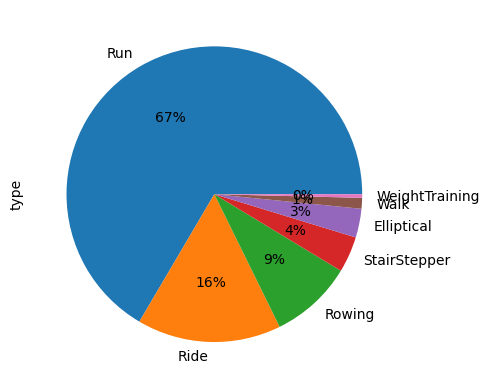

In [39]:
fig, ax = plt.subplots(1)
df["type"].value_counts().plot(kind="pie", autopct="%.0f%%", ax=ax)
# ax.legend(loc="upper left")
# 

Text(0, 0.5, 'Shoe Name')

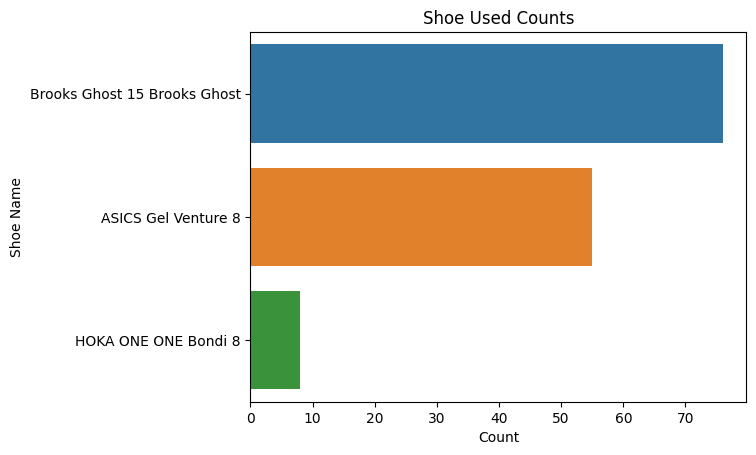

In [40]:
fig, ax = plt.subplots(1)
shoe_counts = df["gear"].value_counts().reset_index()
sea.barplot(data=shoe_counts, x="gear", y="index")
ax.set_title("Shoe Used Counts")
ax.set_xlabel("Count")
ax.set_ylabel("Shoe Name")

Text(0, 0.5, 'Shoe Name')

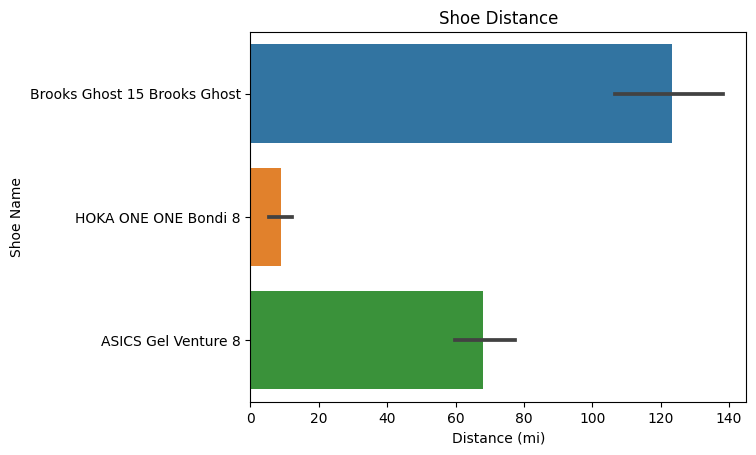

In [41]:
fig, ax = plt.subplots(1)
sea.barplot(data=df, x="shoe_distance", y="gear")
ax.set_title("Shoe Distance")
ax.set_xlabel("Distance (mi)")
ax.set_ylabel("Shoe Name")

Text(0.5, 0, 'Distance (mi)')

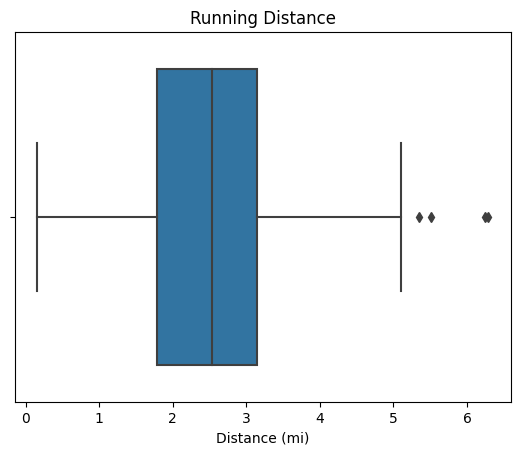

In [42]:
%matplotlib inline
fig, ax = plt.subplots(1)
sea.boxplot(data=df_run, x="distance")
ax.set_title("Running Distance")
ax.set_xlabel("Distance (mi)")


Text(0.5, 0, 'Distance (mi)')

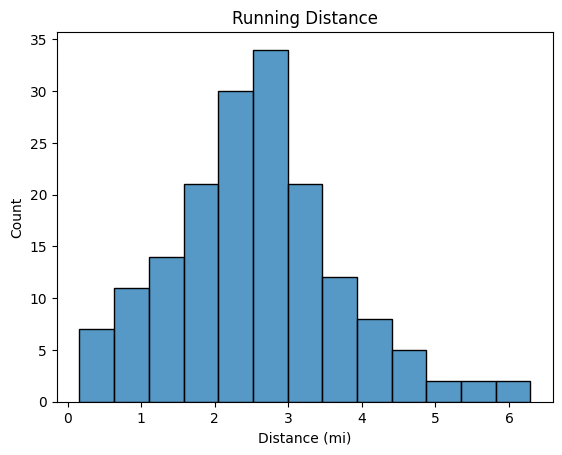

In [43]:
%matplotlib inline
fig, ax = plt.subplots(1)
sea.histplot(data=df_run, x="distance")
ax.set_title("Running Distance")
ax.set_xlabel("Distance (mi)")


Text(0.5, 0, 'Speed (mph)')

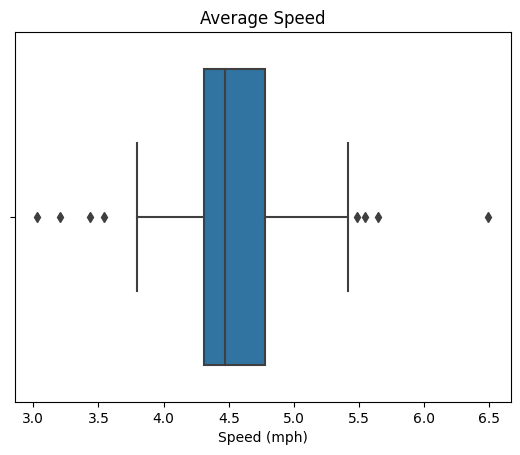

In [44]:
fig, ax = plt.subplots(1)
sea.boxplot(data=df_run, x="average_speed")
ax.set_title("Average Speed")
ax.set_xlabel("Speed (mph)")

Text(0, 0.5, 'Frequency')

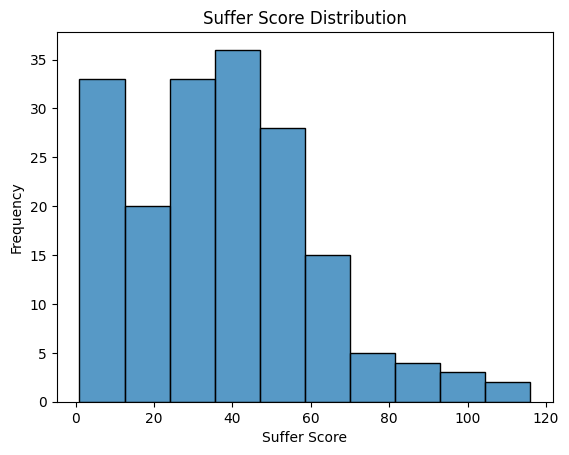

In [45]:
fig, ax = plt.subplots(1)
sea.histplot(data=df, x='suffer_score')
ax.set_title("Suffer Score Distribution")
ax.set_xlabel("Suffer Score")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Suffer Score')

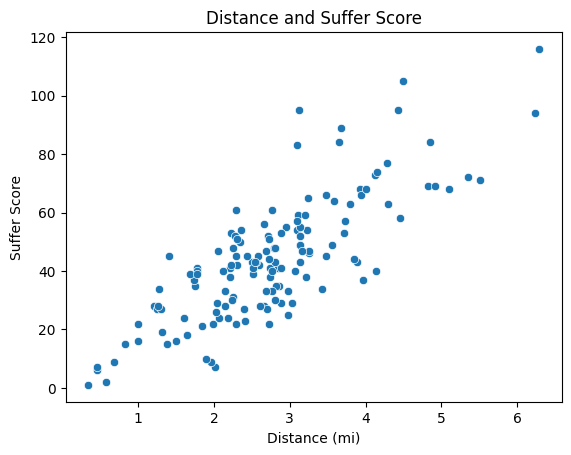

In [46]:
fig, ax = plt.subplots(1)
sea.scatterplot(data=df_run, x="distance", y="suffer_score", )
ax.set_title("Distance and Suffer Score")
ax.set_xlabel("Distance (mi)")
ax.set_ylabel("Suffer Score")

Text(0, 0.5, 'Frequency')

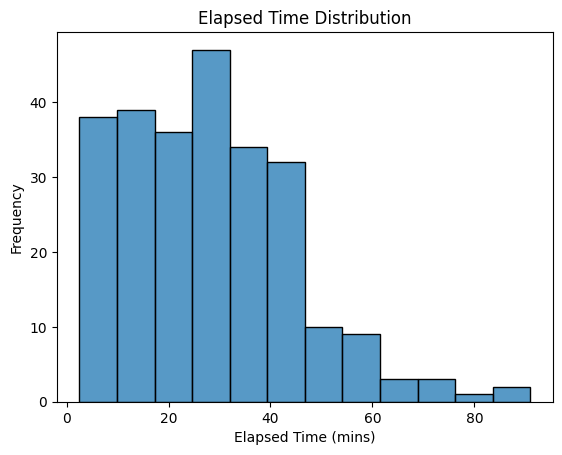

In [47]:
fig, ax = plt.subplots(1)
sea.histplot(data=df, x='elapsed_time')
ax.set_title("Elapsed Time Distribution")
ax.set_xlabel("Elapsed Time (mins)")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

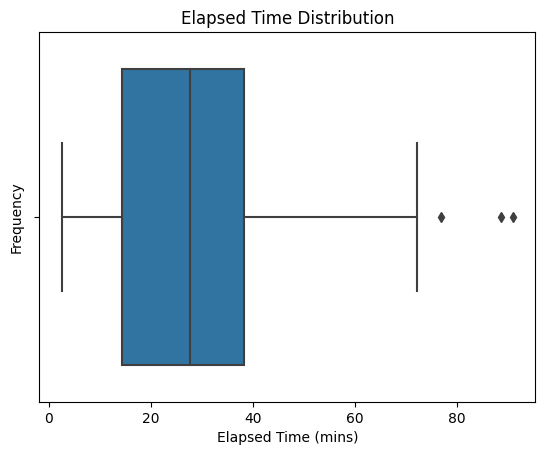

In [48]:
fig, ax = plt.subplots(1)
sea.boxplot(data=df, x='elapsed_time')
ax.set_title("Elapsed Time Distribution")
ax.set_xlabel("Elapsed Time (mins)")
ax.set_ylabel("Frequency")

In [24]:
df.to_csv("data/activities_updated.csv")